In [3]:
import json, time, csv
import pandas as pd
import string
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [7]:
screen_names = []

with open('G_pruned_nodes_final.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in reader:
        screen_names.append(row[0])
        
len(screen_names)

3142

In [37]:
import datetime as dt
from datetime import datetime

timelines_dir = "output4_G_pruned/"

start_date = "2019-01-01"
end_date = "2019-02-01"
numdays = 2

start_datetime_object = datetime.strptime(start_date, '%Y-%m-%d')
end_datetime_object = datetime.strptime(end_date, '%Y-%m-%d')

vol_by_day = {}

while True:
    if start_datetime_object>=end_datetime_object:
        break
    
    date_list = [start_datetime_object + dt.timedelta(days=x) for x in range(numdays)]
    print(date_list)
    
    start_date = date_list[0]
    end_date = date_list[1]

    start_datetime_object = start_datetime_object + dt.timedelta(days=1)

#     for us in screen_names:
#         filename = timelines_dir+"timeline_"+us+".json"
#         print(filename, end=" ")
#         data = []
#         with open(filename) as json_file:
#             for js in json_file:
#                 tw_time = json.loads(js)['tweet']['created_at']
#                 tw_datetime = datetime.strftime(datetime.strptime(tw_time,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
#                 if tw_datetime>=start_date and tw_datetime<end_date:
#                     data.append(json.loads(js)['tweet']['text'])
#                 #break
#         print(len(data))

[datetime.datetime(2019, 1, 1, 0, 0), datetime.datetime(2019, 1, 2, 0, 0)]
[datetime.datetime(2019, 1, 2, 0, 0), datetime.datetime(2019, 1, 3, 0, 0)]
[datetime.datetime(2019, 1, 3, 0, 0), datetime.datetime(2019, 1, 4, 0, 0)]
[datetime.datetime(2019, 1, 4, 0, 0), datetime.datetime(2019, 1, 5, 0, 0)]
[datetime.datetime(2019, 1, 5, 0, 0), datetime.datetime(2019, 1, 6, 0, 0)]
[datetime.datetime(2019, 1, 6, 0, 0), datetime.datetime(2019, 1, 7, 0, 0)]
[datetime.datetime(2019, 1, 7, 0, 0), datetime.datetime(2019, 1, 8, 0, 0)]
[datetime.datetime(2019, 1, 8, 0, 0), datetime.datetime(2019, 1, 9, 0, 0)]
[datetime.datetime(2019, 1, 9, 0, 0), datetime.datetime(2019, 1, 10, 0, 0)]
[datetime.datetime(2019, 1, 10, 0, 0), datetime.datetime(2019, 1, 11, 0, 0)]
[datetime.datetime(2019, 1, 11, 0, 0), datetime.datetime(2019, 1, 12, 0, 0)]
[datetime.datetime(2019, 1, 12, 0, 0), datetime.datetime(2019, 1, 13, 0, 0)]
[datetime.datetime(2019, 1, 13, 0, 0), datetime.datetime(2019, 1, 14, 0, 0)]
[datetime.dateti

In [50]:
# start_date = "2020-01-06"
# end_date = "2020-01-07"

timelines_dir = "output4_G_pruned/"

vol_by_day = {}
for us in screen_names:
    filename = timelines_dir+"timeline_"+us+".json"
    #print(filename)#, end=" ")
    try:
        with open(filename) as json_file:
            for js in json_file:
                tw_time = json.loads(js)['tweet']['created_at']
                tw_datetime = datetime.strftime(datetime.strptime(tw_time,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
                date = str(tw_datetime).split()[0]

                vol_by_day[date] = vol_by_day.get(date,0) + 1

                #break
    except:
        print("NO DATA FOR",us)
print(vol_by_day)

NO DATA FOR ArethaCharles
NO DATA FOR djkuulei808
NO DATA FOR bio4xp
NO DATA FOR POWERGENEU
NO DATA FOR ZeljkoP
NO DATA FOR EHHA2016
NO DATA FOR rlnicholson2
NO DATA FOR eraplanetgeo
NO DATA FOR FestivalEnergia
NO DATA FOR GNCCGas
NO DATA FOR Massoud_Amin
NO DATA FOR SofinnovaParis
NO DATA FOR FutureReadyAus
NO DATA FOR donfur
NO DATA FOR Krypton_Energy
NO DATA FOR bac_rain
NO DATA FOR CEOM_Brussels
NO DATA FOR ISUW2020
NO DATA FOR Megan_MnCEE
NO DATA FOR BarbaJowi
NO DATA FOR ecobee2bee
NO DATA FOR GoSunStove
NO DATA FOR ElectricNation_
NO DATA FOR eudelegation_ua
NO DATA FOR CleanCapital
NO DATA FOR EastEnglandBXL
NO DATA FOR oceanna_eu
NO DATA FOR rogersutherlan4
NO DATA FOR MobyPaul
NO DATA FOR IoT_euLSP
{'2020-04-23': 7776, '2020-04-22': 9753, '2020-04-21': 8457, '2020-04-20': 8108, '2020-04-17': 8667, '2020-04-16': 8636, '2020-04-15': 7707, '2020-04-14': 7681, '2020-04-12': 4737, '2020-04-11': 5134, '2020-04-10': 7090, '2020-04-09': 8988, '2020-04-08': 8762, '2020-04-07': 8892, '

In [57]:
x = []
y = []

for k in sorted(vol_by_day.keys()):
    if '2019' in k:
        x.append(datetime.strptime(k, '%Y-%m-%d'))
        y.append(vol_by_day[k])

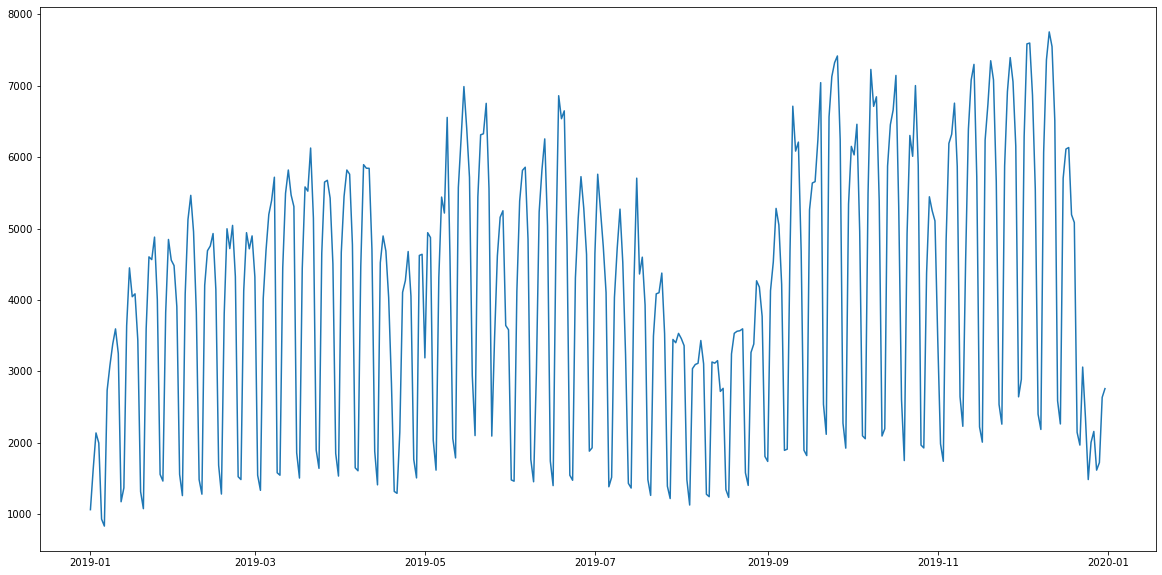

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(x,y)
plt.show()

In [75]:
x_w = []
y_w = []

for i in range(len(x)-3):
    x_w.append(x[i])
    y_w.append((y[i] + y[i+1] + y[i+2])/3)

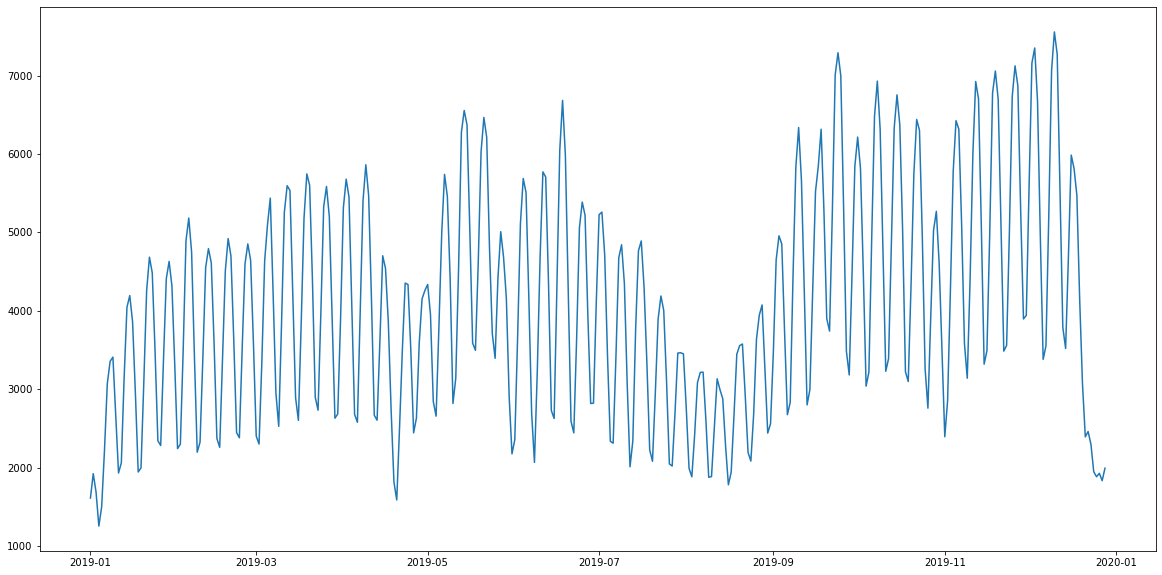

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(x_w,y_w)
plt.show()

In [81]:
import pandas as pd

df = pd.DataFrame(y, index=x, columns =['Vol']) 

In [92]:
df_wind = df.rolling(7).mean()
df_wind

,Vol
2019-01-01,NaN
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-05,NaN
...,...
2019-12-27,2167.142857
2019-12-28,2091.428571
2019-12-29,2056.428571
2019-12-30,1995.857143


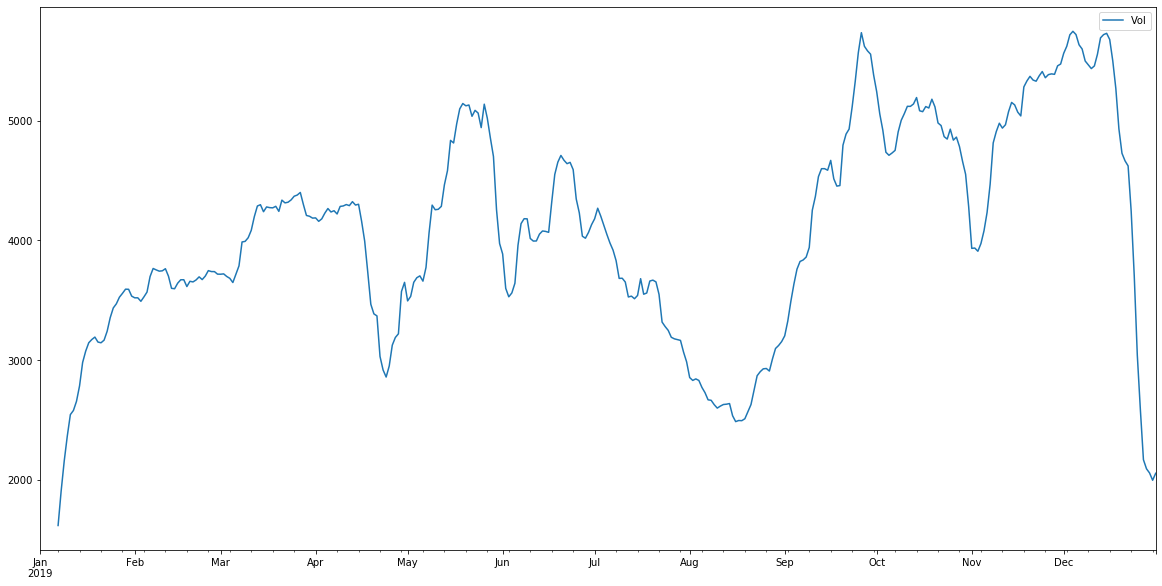

In [93]:
df_wind.plot(figsize=(20, 10))